이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [1]:
# 본인이 필요한 라이브러리 추가

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# 1. KNN 과제

## 1. 데이터 로드

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/tobigs/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


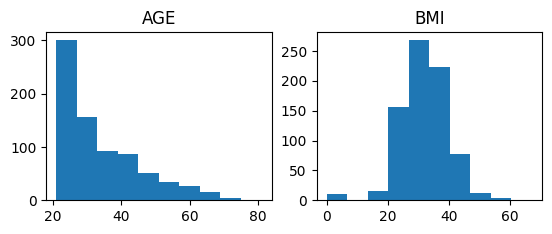

In [ ]:
df1 = df['Age']
df2 = df['BMI']
plt.subplot(221)
plt.hist(df1)
plt.title('AGE')
plt.subplot(222)
plt.hist(df2)
plt.title('BMI')
plt.show()

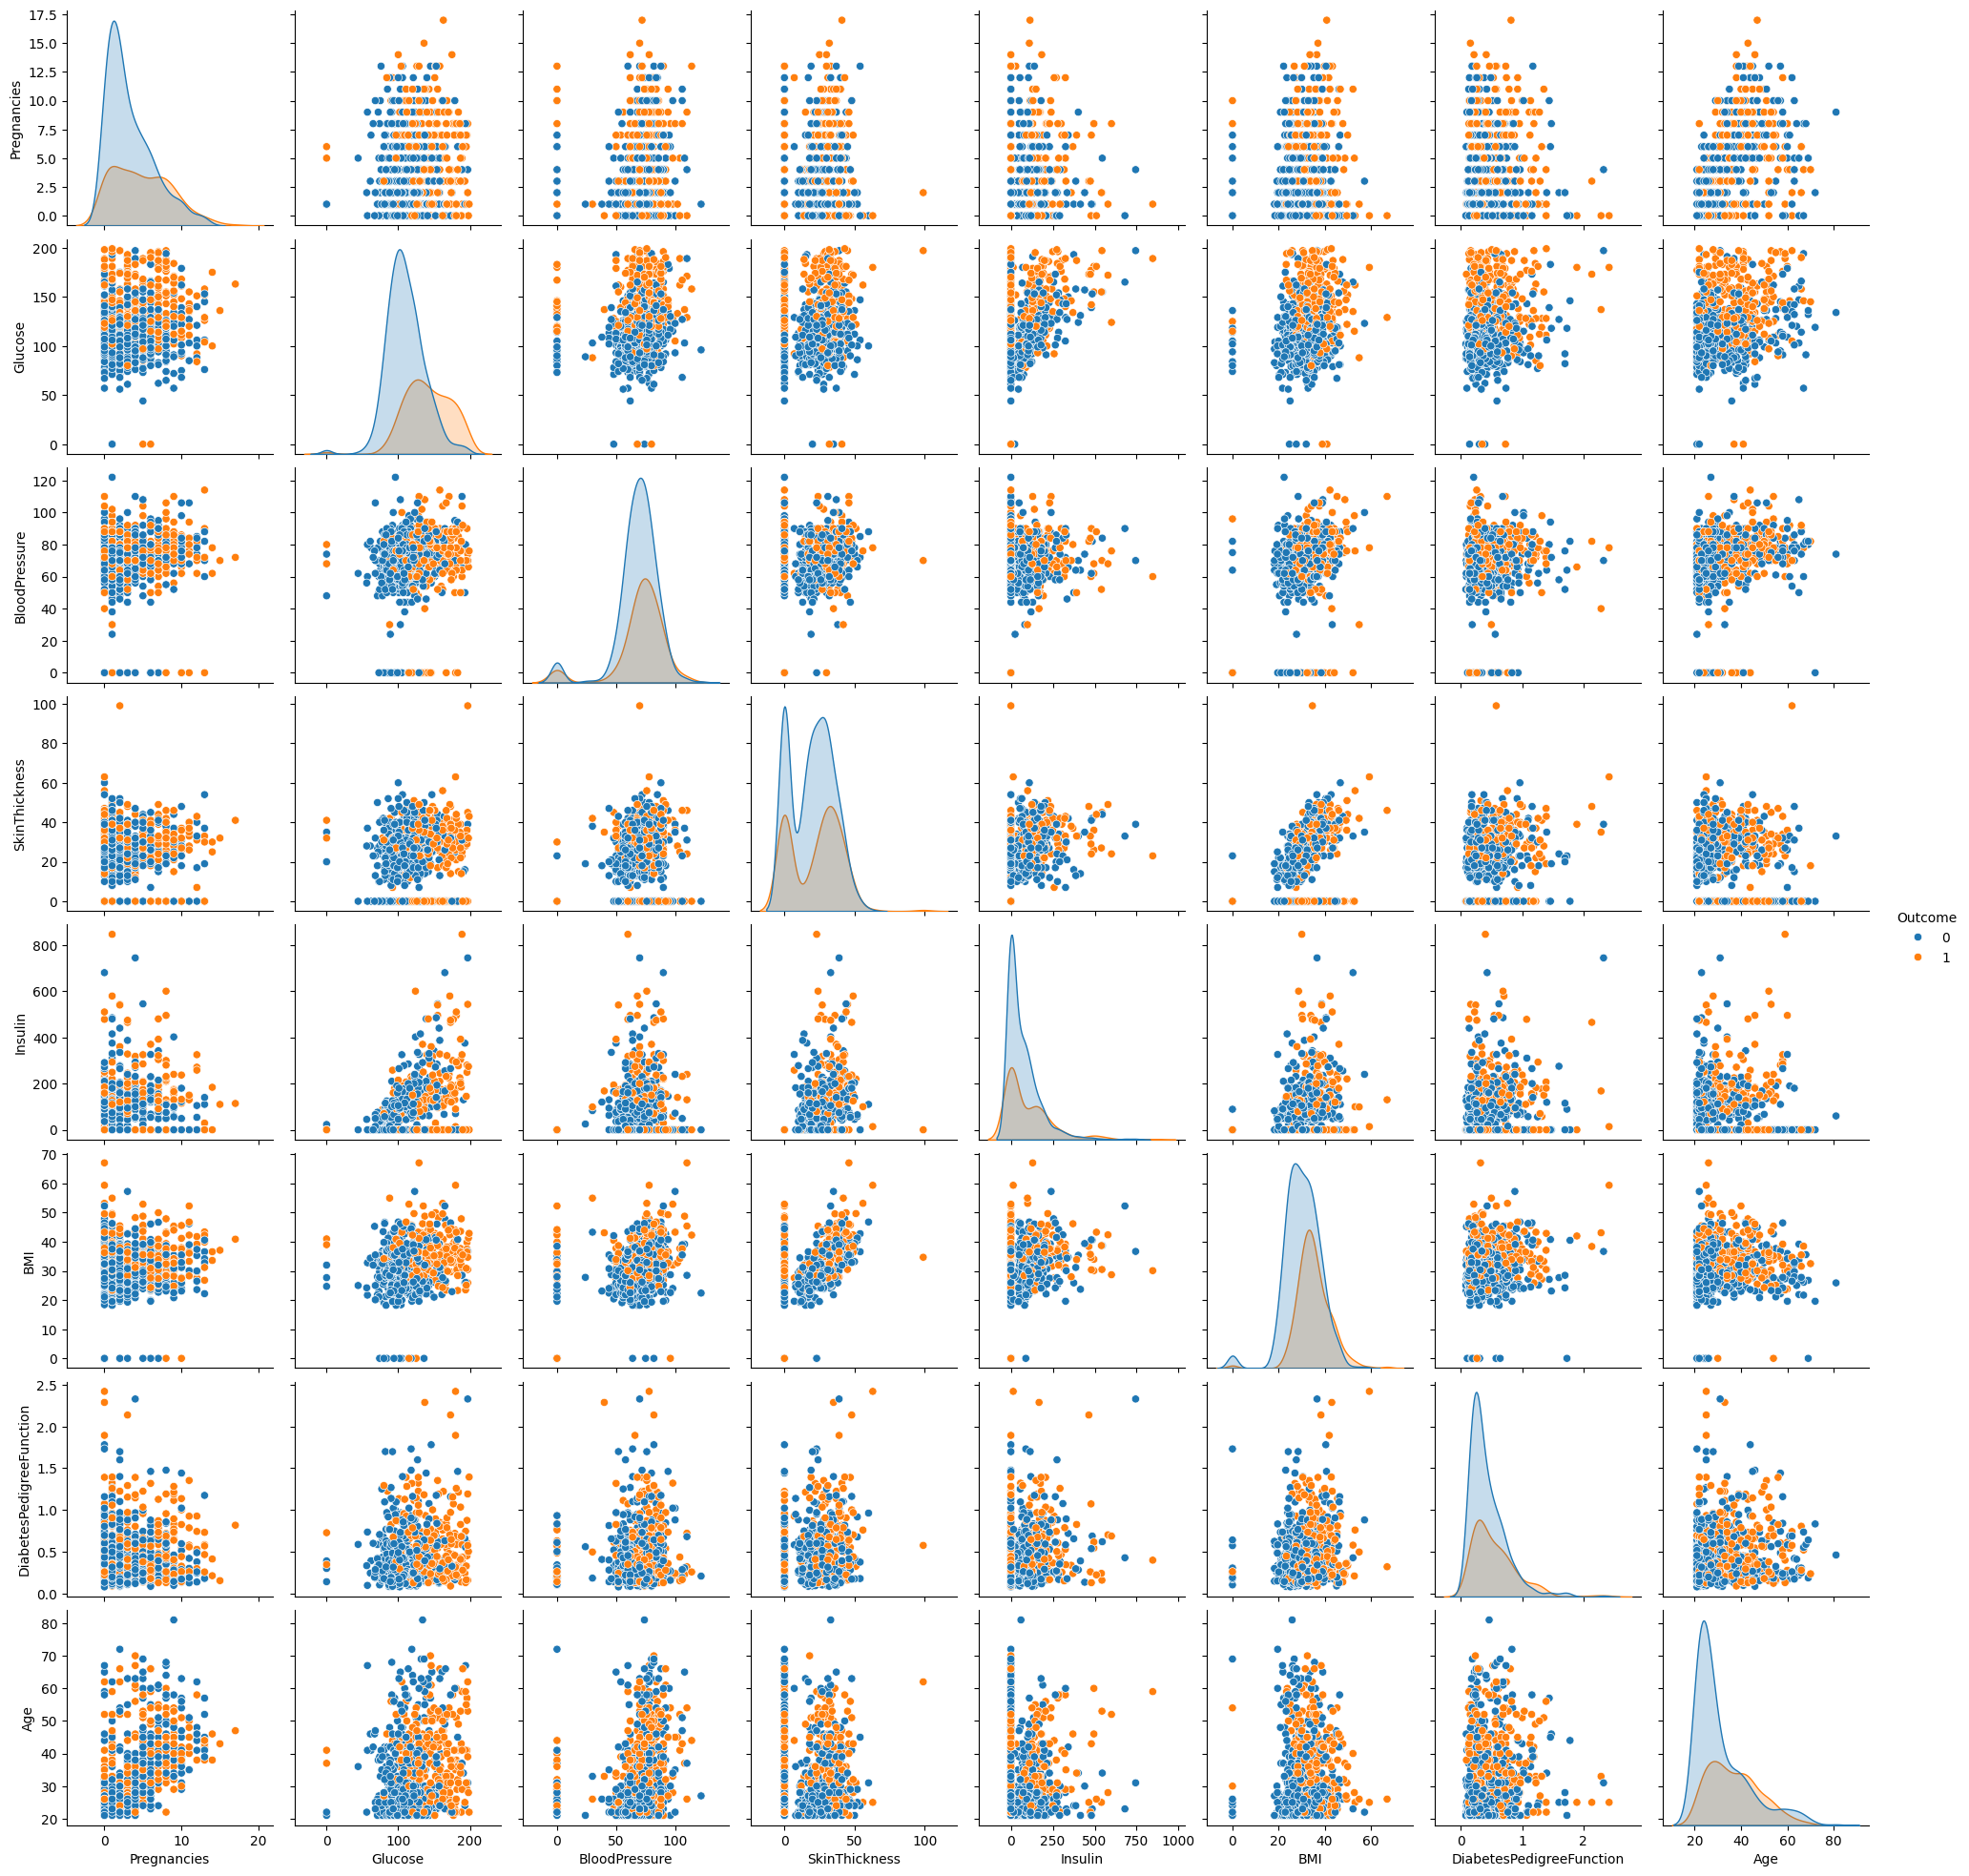

In [55]:
# 페어플롯
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()


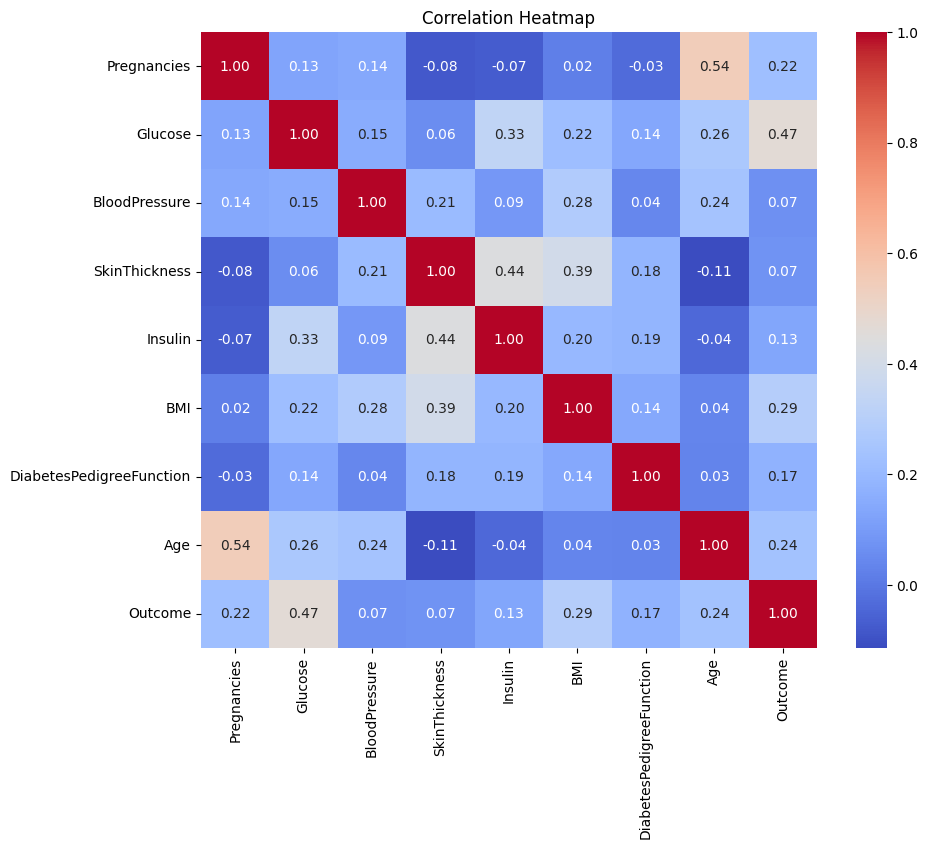

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 행렬 계산
corr_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


## 3. KNN 구현 & 파라미터 튜닝


In [64]:
# Outcome 분리
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)

In [67]:
# 표준화 (Z-스코어 정규화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [68]:
knn = KNeighborsClassifier(n_neighbors=18)

# 모델 학습
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [69]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {'n_neighbors': np.arange(1, 21)}

# GridSearchCV를 사용한 최적의 파라미터 탐색
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

# 최적의 파라미터 출력
print(f'Best k: {knn_gscv.best_params_["n_neighbors"]}')


Best k: 18


In [70]:
from sklearn.neighbors import KNeighborsClassifier

# 유클리드 거리 (기본값)
knn1 = KNeighborsClassifier(n_neighbors=18, metric='euclidean')

# 맨해튼 거리
knn2 = KNeighborsClassifier(n_neighbors=18, metric='manhattan')

# Minkowski 거리 (p=3)
knn3 = KNeighborsClassifier(n_neighbors=18, metric='minkowski', p=3)

#  Mahalanobis distance
      # Mahalanobis 거리
from sklearn.covariance import MinCovDet
      # 공분산 행렬 계산
cov_matrix = MinCovDet().fit(X_train).covariance_
      # Mahalanobis 거리
knn4 = KNeighborsClassifier(n_neighbors=18, metric='mahalanobis', metric_params={'VI': np.linalg.inv(cov_matrix)})


#  Hamming distance
# Hamming 거리
knn5 = KNeighborsClassifier(n_neighbors=18, metric='hamming')


# Jaccard distance
knn6 = KNeighborsClassifier(n_neighbors=18, metric='jaccard')


## 평가

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 리스트
models = [knn1, knn2, knn3, knn4, knn5, knn6]
model_names = ['Euclidean', 'Manhattan', 'Minkowski (p=3)', 'Mahalanobis', 'Hamming', 'Jaccard']

# 모델 학습 및 평가
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 평가 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    print("-" * 30)


Model: Euclidean
Accuracy: 0.7597
Precision: 0.7368
Recall: 0.5091
F1 Score: 0.6022
ROC AUC: 0.7040
------------------------------
Model: Manhattan
Accuracy: 0.7403
Precision: 0.6744
Recall: 0.5273
F1 Score: 0.5918
ROC AUC: 0.6929
------------------------------
Model: Minkowski (p=3)
Accuracy: 0.7532
Precision: 0.7297
Recall: 0.4909
F1 Score: 0.5870
ROC AUC: 0.6949
------------------------------
Model: Mahalanobis
Accuracy: 0.7078
Precision: 0.6786
Recall: 0.3455
F1 Score: 0.4578
ROC AUC: 0.6273
------------------------------
Model: Hamming
Accuracy: 0.6558
Precision: 0.6250
Recall: 0.0909
F1 Score: 0.1587
ROC AUC: 0.5303
------------------------------
Model: Jaccard
Accuracy: 0.6429
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.5000
------------------------------


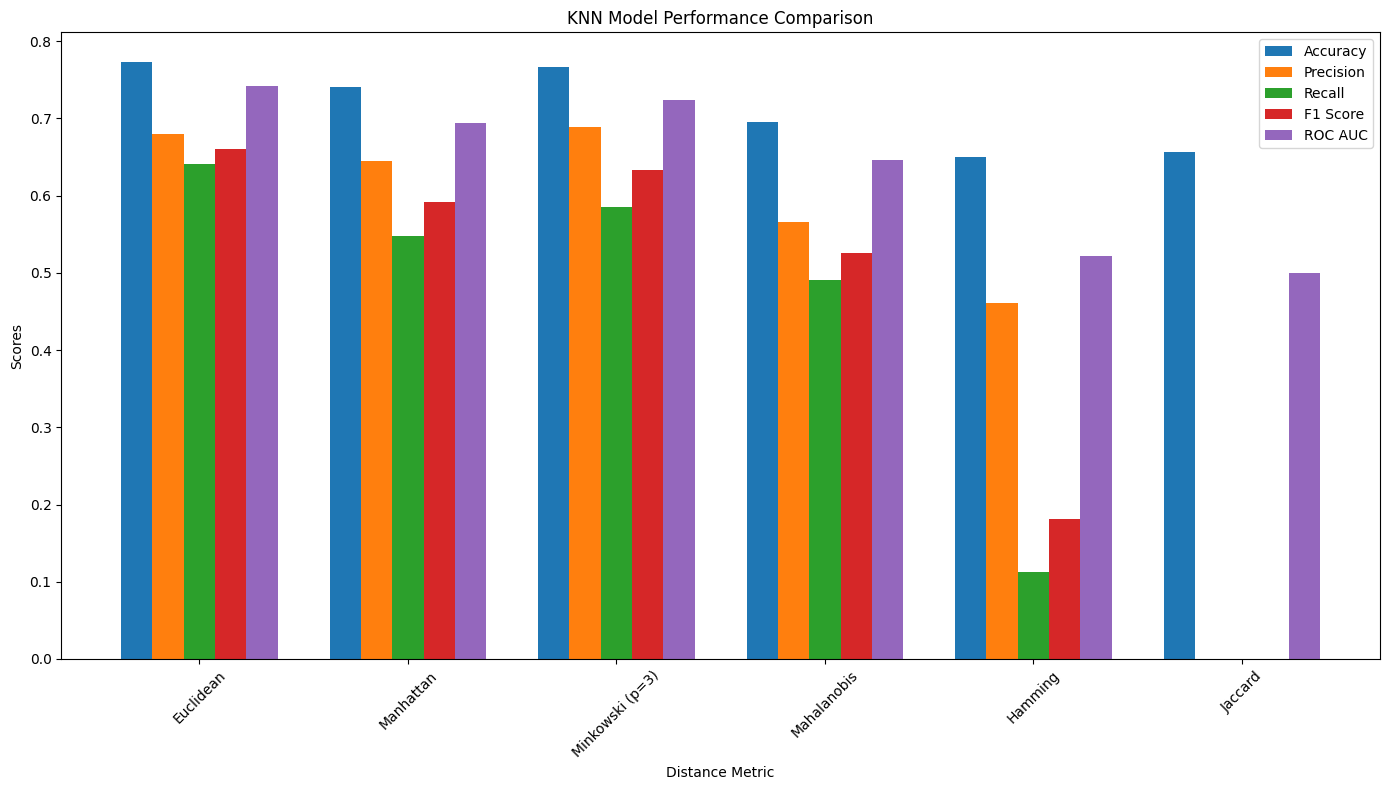

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# 평가지표 저장
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# 각 모델에 대해 성능 평가
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))

# 막대그래프 그리기
x = np.arange(len(model_names))
width = 0.15

fig, ax = plt.subplots(figsize=(14, 8))

# 각 평가지표의 막대그래프
rects1 = ax.bar(x - 2*width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - width, precision_scores, width, label='Precision')
rects3 = ax.bar(x, recall_scores, width, label='Recall')
rects4 = ax.bar(x + width, f1_scores, width, label='F1 Score')
rects5 = ax.bar(x + 2*width, roc_auc_scores, width, label='ROC AUC')

ax.set_xlabel('Distance Metric')
ax.set_ylabel('Scores')
ax.set_title('KNN Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


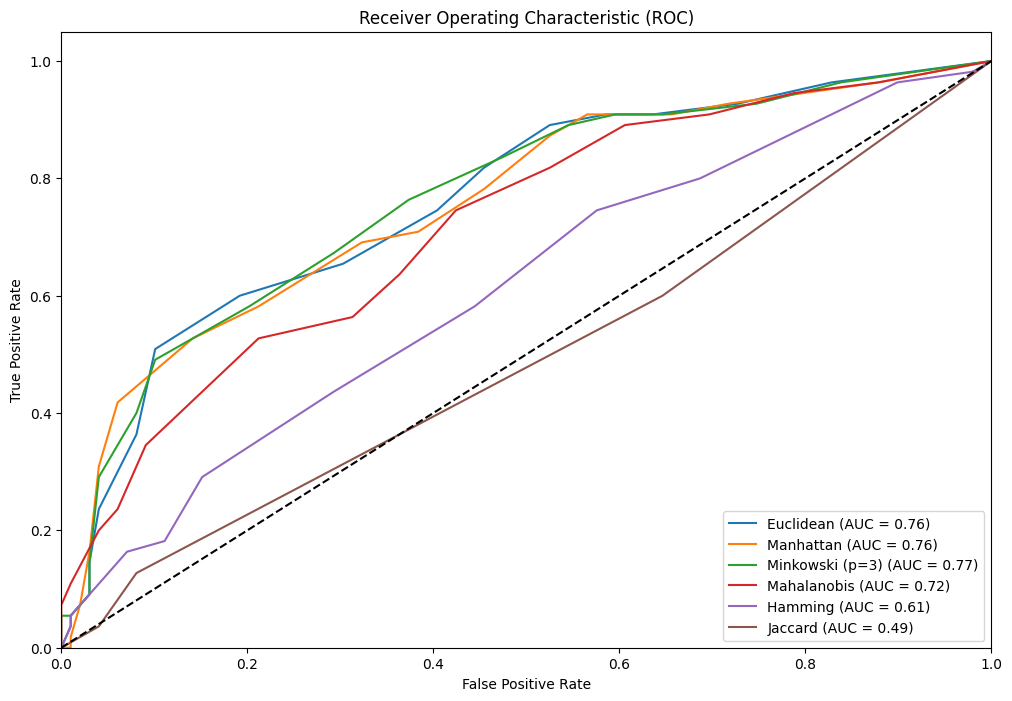

In [73]:
from sklearn.metrics import roc_curve, auc

# ROC 커브 그리기
plt.figure(figsize=(12, 8))

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# 그래프 설정
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.show()


---
# 2. K-Means 과제

## 1. 데이터 로드

In [21]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/tobigs/Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

## 2. 데이터 전처리/EDA

In [22]:
# 불필요한 열 삭제
df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)

In [23]:
#기본 통계량 확인
print(df.describe())

# 결측치 확인
print(df.isnull().sum())

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


In [25]:
# 상관관계 행렬 계산
correlation_matrix = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].corr()

# 상관관계 행렬 출력
print(correlation_matrix)

               num_reactions  num_comments  num_shares  num_likes  num_loves  \
num_reactions       1.000000      0.150843    0.250723   0.994923   0.305003   
num_comments        0.150843      1.000000    0.640637   0.101687   0.521223   
num_shares          0.250723      0.640637    1.000000   0.172492   0.820000   
num_likes           0.994923      0.101687    0.172492   1.000000   0.209308   
num_loves           0.305003      0.521223    0.820000   0.209308   1.000000   
num_wows            0.267752      0.162394    0.407628   0.207800   0.508798   
num_hahas           0.176028      0.325048    0.399826   0.120784   0.507830   
num_sads            0.075138      0.236453    0.199970   0.052169   0.207600   
num_angrys          0.124326      0.225184    0.312513   0.087431   0.371001   

               num_wows  num_hahas  num_sads  num_angrys  
num_reactions  0.267752   0.176028  0.075138    0.124326  
num_comments   0.162394   0.325048  0.236453    0.225184  
num_shares     0.40762

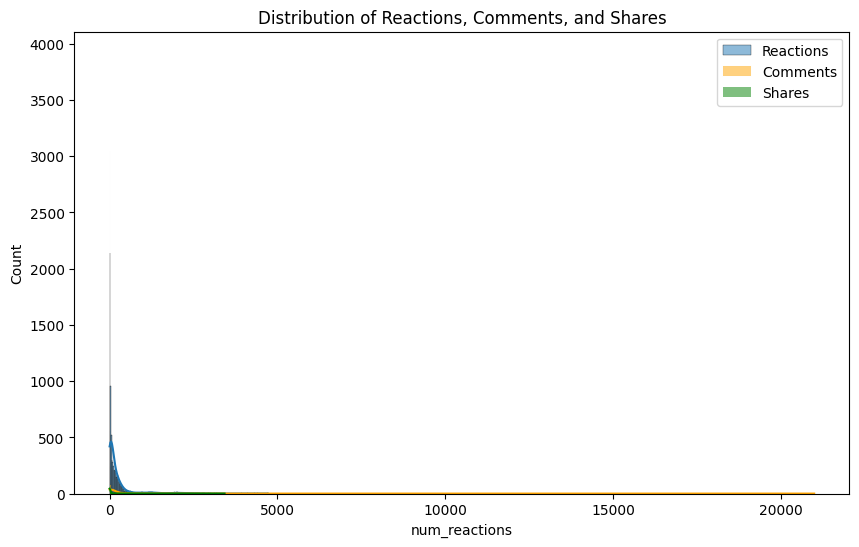

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 반응별 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['num_reactions'], kde=True, label='Reactions')
sns.histplot(df['num_comments'], kde=True, label='Comments', color='orange')
sns.histplot(df['num_shares'], kde=True, label='Shares', color='green')
plt.legend()
plt.title('Distribution of Reactions, Comments, and Shares')
plt.show()


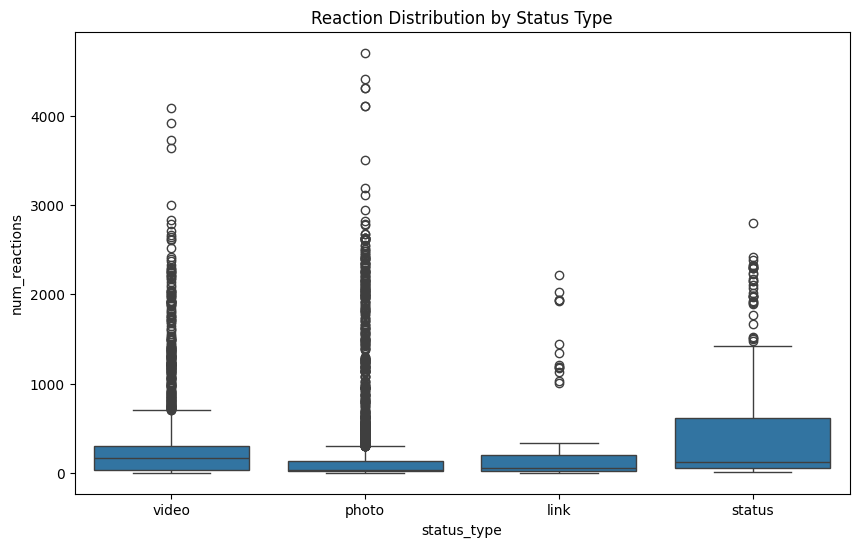

In [26]:
# 게시물 유형별 반응 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='status_type', y='num_reactions', data=df)
plt.title('Reaction Distribution by Status Type')
plt.show()


## 3. K-Means 구현 & 파라미터 튜닝

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# 데이터 정규화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])


### 엘보우 방법

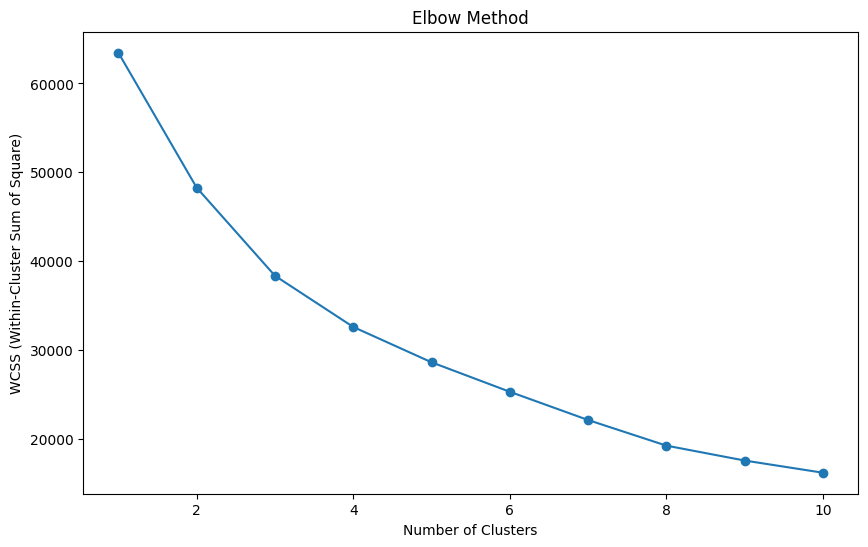

In [29]:
# 범위 설정
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.show()


In [42]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters2 = kmeans.fit_predict(scaled_features)
df['Cluster2'] = clusters2

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters3 = kmeans.fit_predict(scaled_features)
df['Cluster3'] = clusters3


k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters4 = kmeans.fit_predict(scaled_features)
df['Cluster4'] = clusters4

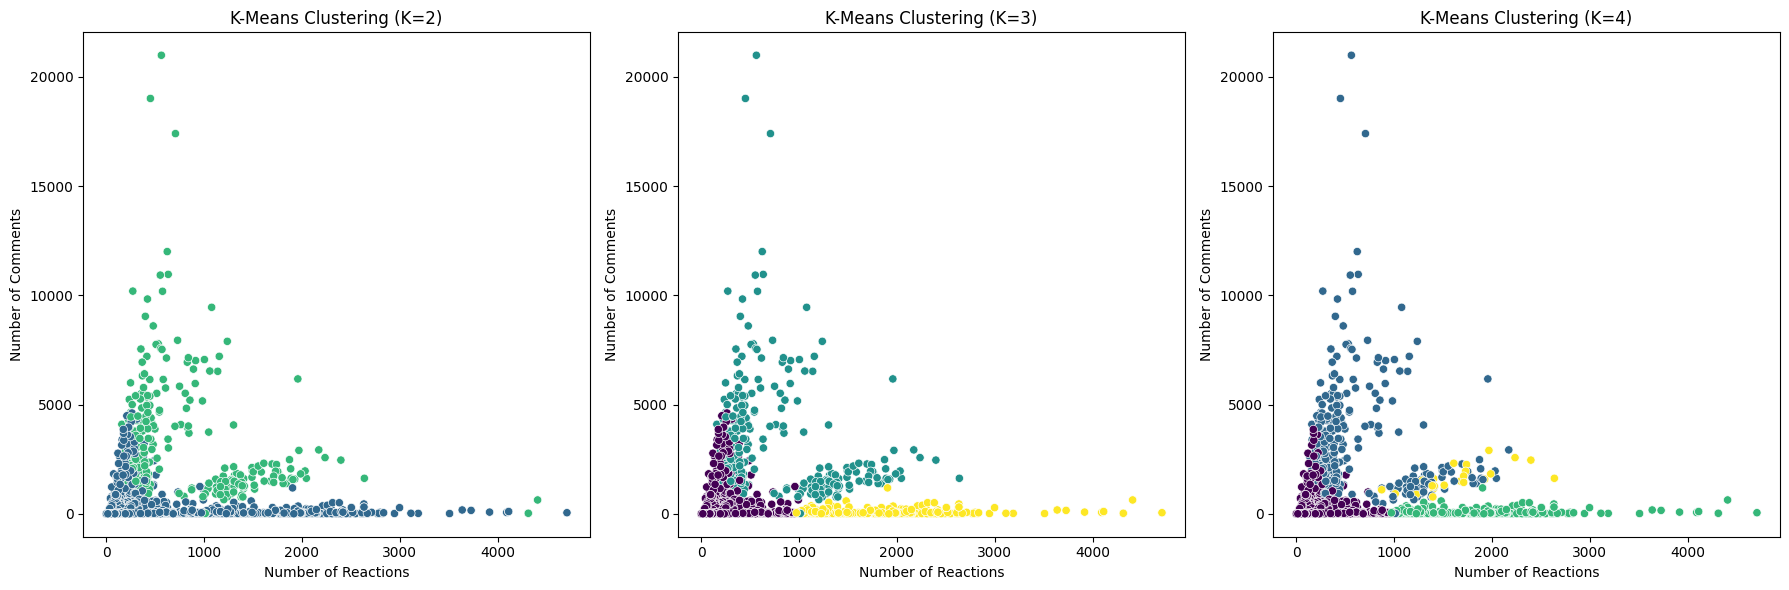

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# figure 및 axes 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1행 3열의 그래프 배열

# Cluster2 (K=2)
sns.scatterplot(ax=axes[0], x=df['num_reactions'], y=df['num_comments'], hue=df['Cluster2'], palette='viridis', legend=None)
axes[0].set_title('K-Means Clustering (K=2)')
axes[0].set_xlabel('Number of Reactions')
axes[0].set_ylabel('Number of Comments')

# Cluster3 (K=3)
sns.scatterplot(ax=axes[1], x=df['num_reactions'], y=df['num_comments'], hue=df['Cluster3'], palette='viridis', legend=None)
axes[1].set_title('K-Means Clustering (K=3)')
axes[1].set_xlabel('Number of Reactions')
axes[1].set_ylabel('Number of Comments')

# Cluster4 (K=4)
sns.scatterplot(ax=axes[2], x=df['num_reactions'], y=df['num_comments'], hue=df['Cluster4'], palette='viridis', legend=None)
axes[2].set_title('K-Means Clustering (K=4)')
axes[2].set_xlabel('Number of Reactions')
axes[2].set_ylabel('Number of Comments')

plt.tight_layout()
plt.show()


In [ ]:
# 그림상으로는 2또는 3이 적절해보인다.

### Silhouette method 방법

In [36]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

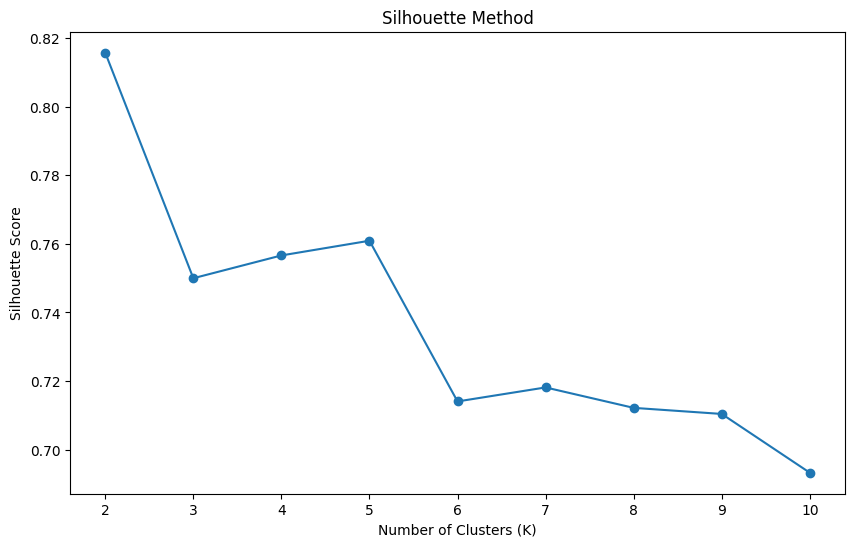

In [37]:
silhouette_scores = []

# 클러스터 수(K) 범위 설정
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Silhouette 점수 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


In [38]:
# Silhouette 점수가 가장 높은 K 값 선택
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'Optimal number of clusters: {optimal_k}')

# 최적의 K 값으로 K-means 클러스터링 실행
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# 원래 데이터프레임에 클러스터 결과 추가
df['Cluster'] = clusters

Optimal number of clusters: 2


In [ ]:
# 2가 적절해보인다.

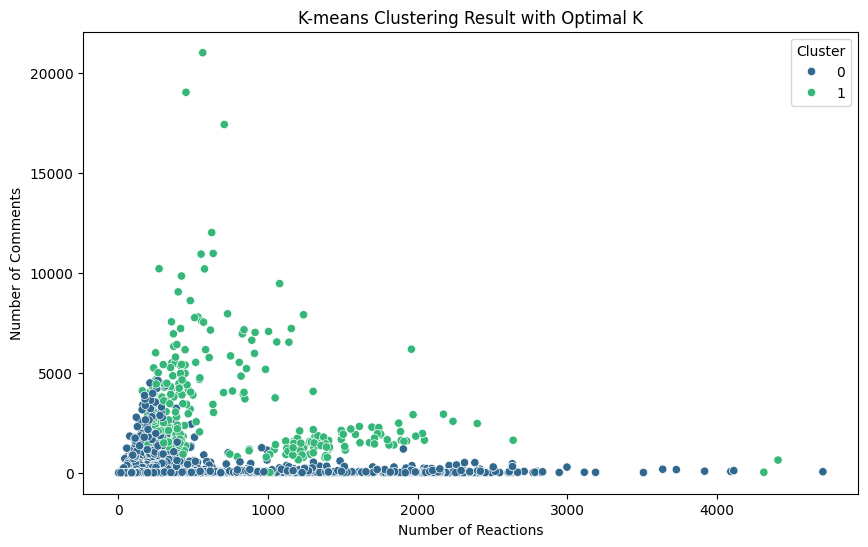

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0      -0.052105     -0.135249   -0.142971  -0.038797  -0.137482 -0.073776   
1       1.288556      3.344702    3.535650   0.959459   3.399928  1.824482   

   num_hahas  num_sads  num_angrys  
0  -0.092316 -0.063228   -0.084878  
1   2.282966  1.563633    2.099034  


In [39]:
# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['num_reactions'], y=df['num_comments'], hue=df['Cluster'], palette='viridis')
plt.title('K-means Clustering Result with Optimal K')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.show()

# 각 클러스터의 평균값 확인
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print(cluster_centers)

## 4. 평가

In [46]:
# 첫 번째 모델 (예: K=5, 엘보우 방법에서 선택한 K 값)
kmeans_1 = KMeans(n_clusters=2, random_state=42)
clusters_1 = kmeans_1.fit_predict(scaled_features)

wcss_1 = kmeans_1.inertia_
silhouette_1 = silhouette_score(scaled_features, clusters_1)

print(f"Model 1 - K=2")
print(f"WCSS: {wcss_1}")
print(f"Silhouette Score: {silhouette_1}")
print("")

kmeans_1 = KMeans(n_clusters=3, random_state=42)
clusters_1 = kmeans_1.fit_predict(scaled_features)

wcss_1 = kmeans_1.inertia_
silhouette_1 = silhouette_score(scaled_features, clusters_1)

print(f"Model 1 - K=3")
print(f"WCSS: {wcss_1}")
print(f"Silhouette Score: {silhouette_1}")
print("")


kmeans_1 = KMeans(n_clusters=4, random_state=42)
clusters_1 = kmeans_1.fit_predict(scaled_features)

wcss_1 = kmeans_1.inertia_
silhouette_1 = silhouette_score(scaled_features, clusters_1)

print(f"Model 1 - K=4")
print(f"WCSS: {wcss_1}")
print(f"Silhouette Score: {silhouette_1}")
print("")

# 실루엣 방법에서 선택한 K값
kmeans_2 = KMeans(n_clusters=optimal_k, random_state=42)
clusters_2 = kmeans_2.fit_predict(scaled_features)

wcss_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, clusters_2)

print(f"Model 2 - K={optimal_k} (from Silhouette Method)")
print(f"WCSS: {wcss_2}")
print(f"Silhouette Score: {silhouette_2}")

Model 1 - K=2
WCSS: 48278.0982422049
Silhouette Score: 0.8157664963353164

Model 1 - K=3
WCSS: 38372.99772386941
Silhouette Score: 0.7499921477392748

Model 1 - K=4
WCSS: 32615.29318898435
Silhouette Score: 0.7566415831793409

Model 2 - K=2 (from Silhouette Method)
WCSS: 48278.0982422049
Silhouette Score: 0.8157664963353164


In [ ]:
#엘보우 방법에서 k=2일 때 혹은 실루엣 방법에서 k=2일 때 Silhouette Score가 높게 나온다.